<a href="https://colab.research.google.com/github/ParitoshP702/BO_vs_RL_Pricing/blob/main/Action_Space_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
from tqdm import tqdm
import torch

In [ ]:
# true_coeff = np.array([-150,480,-165,22,-1])

In [ ]:
from scipy.optimize import minimize

In [ ]:
def ActionSpace():
    epsilon_array = []
    epsilon_array2 = []
    epsilon_array3 = []
    mu_ = np.random.uniform(size = 2)
    sigma_ = np.random.uniform(size= 2)
    mu2 = np.random.uniform(size = 2)
    sigma2 = np.random.uniform(size = 2)
    mu3 = np.random.uniform(size = 2)
    sigma3 = np.random.uniform(size = 2)
    def p_vector(p):
        p_arr = np.array([p,p**2])
        return p_arr

    def g_fun(p,*args):
        p_vec = np.array([p,p**2])
        coeff_array = args
        return -np.sum(coeff_array*p_vec)
    w = mu_
    w2 = mu2
    w3 = mu3
    pl = 0
    ph = 100
    price_estimate = minimize(g_fun,x0 = np.array([random.random()]),args = (w),bounds = [(pl,ph)])["x"][0]
    price_estimate2 = minimize(g_fun,x0 = np.array([random.random()]),args = (w2),bounds = [(pl,ph)])["x"][0]
    price_estimate3 = minimize(g_fun,x0 = np.array([random.random()]),args = (w3),bounds = [(pl,ph)])["x"][0]
    # price_estimate_arr = np.array([price_estimate,price_estimate2,price_estimate3])
    p_array = []
    reven_array_true = []
    p_array2 = []
    reven_array2 = []
    p_array3 = []
    reven_array3 = []
    p_curr = p_vector(price_estimate)
    p_array.append(price_estimate)
    p_curr2 = p_vector(price_estimate2)
    p_array2.append(price_estimate2)
    p_curr3 = p_vector(price_estimate3)
    p_array3.append(price_estimate3)
    alpha = 0.05
    # print(p_array)
    for t in tqdm(range(1,101)):
        rev_curr = 100*np.exp(-((price_estimate-5)**2)/20)+np.random.normal(0,3)
    #     rev_curr_predict = (w.reshape(1,5)@p_curr)[0][0]
    #     print(rev_curr)
        reven_array_true.append(rev_curr)
    #     reven_array_predicted.append(rev_curr_predict
        # sigma_ = sigma_*np.random.normal(0,1)
        mu = torch.tensor(mu_.reshape(len(mu_),1),requires_grad = True)
        # sigma = torch.tensor(sigma_.reshape(len(sigma_),1),requires_grad = True)
        sum = torch.tensor([0])
        # print(p_array)
        # print(f"we are in time: {t}")
        for i in range(len(p_array)):
            p_vec = p_vector(p_array[i])
            # print(p_vec)
            p_vec = p_vec.reshape(len(p_vec),1)
            # print(p_vec)
            p_vec = torch.tensor(p_vec)
            revenue = reven_array_true[i]
            sum =sum + ((torch.transpose(mu,0,1)@p_vec - torch.tensor([[revenue]]))**2)/t
        # print(sum.size())
        external_grad = torch.tensor([[1]])
        sum.backward(gradient = external_grad)
        mu_ = (mu- alpha*mu.grad).detach().numpy()
        # sigma_ = (sigma - alpha*sigma.grad).detach().numpy()
        w = mu_
    #     print(w)
        price_estimate = minimize(g_fun,x0 = np.array([random.random()]),args = (w),bounds = [(pl,ph)])["x"][0]
        epsi = np.exp(-(t-1))
        unif = np.random.uniform(size = 1)
        if unif < epsi:
          price_estimate = np.random.uniform(low = pl,high = ph,size  = 1)[0]
        p_array.append(price_estimate)
        p_curr = p_vector(price_estimate)
        # print(p_curr)
        epsilon = np.max([0,np.min(100 - np.array(reven_array_true))])
        epsilon_array.append(epsilon)





    # for second starting point
    for t in tqdm(range(1,101)):
        rev_curr2 = 100*np.exp(-((price_estimate2-5)**2)/20)+np.random.normal(0,3)
    #     rev_curr_predict = (w.reshape(1,5)@p_curr)[0][0]
    #     print(rev_curr)
        reven_array2.append(rev_curr2)
    #     reven_array_predicted.append(rev_curr_predict
        # sigma2 = sigma2*np.random.normal(0,1)
        mu = torch.tensor(mu2.reshape(len(mu2),1),requires_grad = True)
        # sigma = torch.tensor(sigma2.reshape(len(sigma2),1),requires_grad = True)
        sum = torch.tensor([0])
        for i in range(len(p_array2)):
            p_vec = p_vector(p_array2[i])
            p_vec = p_vec.reshape(len(p_vec),1)
            p_vec = torch.tensor(p_vec)
            revenue = reven_array2[i]
            sum =sum + ((torch.transpose(mu,0,1)@p_vec - torch.tensor([[revenue]]))**2)/t
        # print(sum.size())
        external_grad = torch.tensor([[1]])
        sum.backward(gradient = external_grad)
        mu2 = (mu- alpha*mu.grad).detach().numpy()
        # sigma2 = (sigma - alpha*sigma.grad).detach().numpy()
        w2 = mu2
    #     print(w)
        price_estimate2 = minimize(g_fun,x0 = np.array([random.random()]),args = (w2),bounds = [(pl,ph)])["x"][0]
        epsi = np.exp(-(t-1))
        unif = np.random.uniform(size = 1)
        if unif < epsi:
          price_estimate2 = np.random.uniform(low = pl,high = ph,size  = 1)[0]
        p_array2.append(price_estimate2)
        p_curr2 = p_vector(price_estimate2)
        # print(p_curr)
        epsilon = np.max([0,np.min(100 - np.array(reven_array2))])
        epsilon_array2.append(epsilon)







    # for third starting point
    for t in tqdm(range(1,101)):
        rev_curr3 = 100*np.exp(-((price_estimate3-5)**2)/20)+np.random.normal(0,3)
    #     rev_curr_predict = (w.reshape(1,5)@p_curr)[0][0]
    #     print(rev_curr)
        reven_array3.append(rev_curr3)
    #     reven_array_predicted.append(rev_curr_predict
        # sigma3 = sigma3*np.random.normal(0,1)
        mu = torch.tensor(mu3.reshape(len(mu3),1),requires_grad = True)
        # sigma = torch.tensor(sigma3.reshape(len(sigma3),1),requires_grad = True)
        sum = torch.tensor([0])
        for i in range(len(p_array3)):
            p_vec = p_vector(p_array3[i])
            p_vec = p_vec.reshape(len(p_vec),1)
            p_vec = torch.tensor(p_vec)
            revenue = reven_array3[i]
            sum =sum + ((torch.transpose(mu,0,1)@p_vec - torch.tensor([[revenue]]))**2)/t
        # print(sum.size())
        external_grad = torch.tensor([[1]])
        sum.backward(gradient = external_grad)
        mu3 = (mu- alpha*mu.grad).detach().numpy()
        # sigma3 = (sigma - alpha*sigma.grad).detach().numpy()
        w3 = mu3
    #     print(w)
        price_estimate3 = minimize(g_fun,x0 = np.array([random.random()]),args = (w3),bounds = [(pl,ph)])["x"][0]
        epsi = np.exp(-(t-1))
        unif = np.random.uniform(size = 1)
        if unif < epsi:
          price_estimate3 = np.random.uniform(low = pl,high = ph,size  = 1)[0]
        p_array3.append(price_estimate3)
        p_curr3 = p_vector(price_estimate3)
        # print(p_curr)
        epsilon = np.max([0,np.min(100 - np.array(reven_array3))])
        epsilon_array3.append(epsilon)



    e= np.array([np.min(epsilon_array),np.min(epsilon_array2),np.min(epsilon_array3)])
    ex = np.argmin(e)
    if ex == 0:
      return np.array(epsilon_array)
    if ex == 1:
      return np.array(epsilon_array2)
    if ex == 2:
      return np.array(epsilon_array3)



In [ ]:
best_till_now = []
for i in tqdm(range(10)):
  best_till_now.append(ActionSpace())
# np.mean(best_till_now)

 42%|████▏     | 42/100 [00:00<00:00, 114.36it/s]/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0

100%|██████████| 100/100 [00:01<00:00, 76.82it/s]

100%|██████████| 100/100 [00:01<00:00, 92.25it/s]

100%|██████████| 100/100 [00:01<00:00, 73.42it/s]

 25%|██▌       | 25/100 [00:00<00:00, 236.63it/s]<ipython-input-4-d616a99fe620>:18: RuntimeWarning: overflow encountered in multiply
  return -np.sum(coeff_array*p_vec)

100%|██████████| 100/100 [00:01<00:00, 65.21it/s]

100%|██████████| 100/100 [00:00<00:00, 107.11it/s]

100%|██████████| 100/100 [00:00<00:00, 104.82it/s]

100%|██████████| 100/100 [00:00<00:00, 102.85it/s]

100%|██████████| 100/100 [00:00<00:00, 106.13it/s]

100%|██████████| 100/100 [00:00<00:00, 105.06it/s]

100%|██████████| 100/100 [00:00<00:00, 104.59it/s]

100%|██████████| 100/100 [00:01<00:00, 74.38it/s]

100%|██████████| 100/100 [00:01<00:00, 67.35it/s]

100%|██████████| 

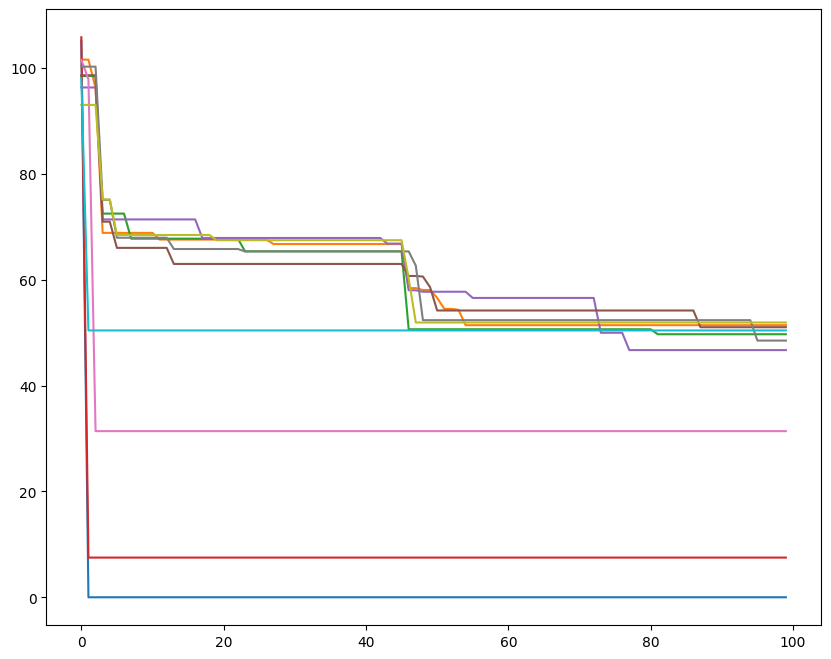

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
for i in range(10):
  plt.plot(best_till_now[i])

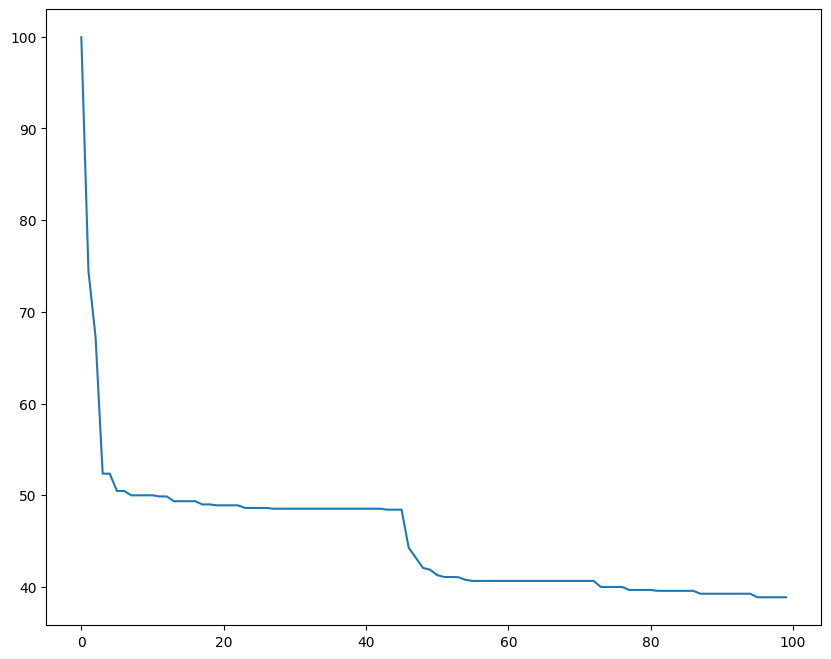

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(np.mean(best_till_now,axis = 0))

In [ ]:
import pickle
best_till_now = np.mean(best_till_now,axis = 0)

In [ ]:
file_path = open("Action_Space_exp_reven.txt","wb")
pickle.dump(best_till_now,file_path)

In [ ]:
best_till_now

array([99.93361328, 74.44135659, 67.25308092, 52.34932095, 52.34932095,
       50.46545006, 50.46545006, 49.99159979, 49.99159979, 49.99159979,
       49.99159979, 49.86559243, 49.86559243, 49.34856132, 49.34856132,
       49.34856132, 49.34856132, 48.99796259, 48.99796259, 48.89913051,
       48.89913051, 48.89913051, 48.89913051, 48.61474033, 48.61474033,
       48.61474033, 48.61474033, 48.53009927, 48.53009927, 48.53009927,
       48.53009927, 48.53009927, 48.53009927, 48.53009927, 48.53009927,
       48.53009927, 48.53009927, 48.53009927, 48.53009927, 48.53009927,
       48.53009927, 48.53009927, 48.53009927, 48.4234078 , 48.4234078 ,
       48.4234078 , 44.28253214, 43.18255066, 42.07764906, 41.877933  ,
       41.2897218 , 41.07926205, 41.07926205, 41.06201187, 40.77158143,
       40.65454422, 40.65454422, 40.65454422, 40.65454422, 40.65454422,
       40.65454422, 40.65454422, 40.65454422, 40.65454422, 40.65454422,
       40.65454422, 40.65454422, 40.65454422, 40.65454422, 40.65